<a href="https://colab.research.google.com/github/Teju-Tejaswini-001/AIML-2025/blob/main/LAB_EXTERNAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

In [30]:
data = pd.read_csv('/content/house_price_regression_dataset.csv')

In [31]:
print(data.isnull().sum())
print(data.duplicated().sum())

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64
0


In [32]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
None
       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min      

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

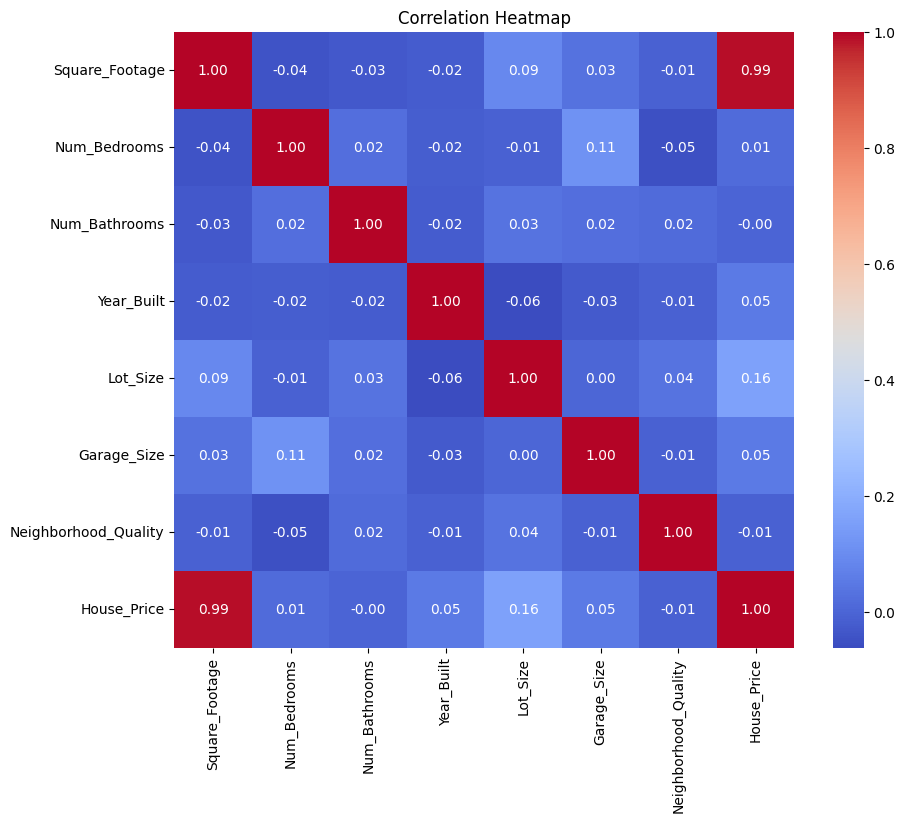

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

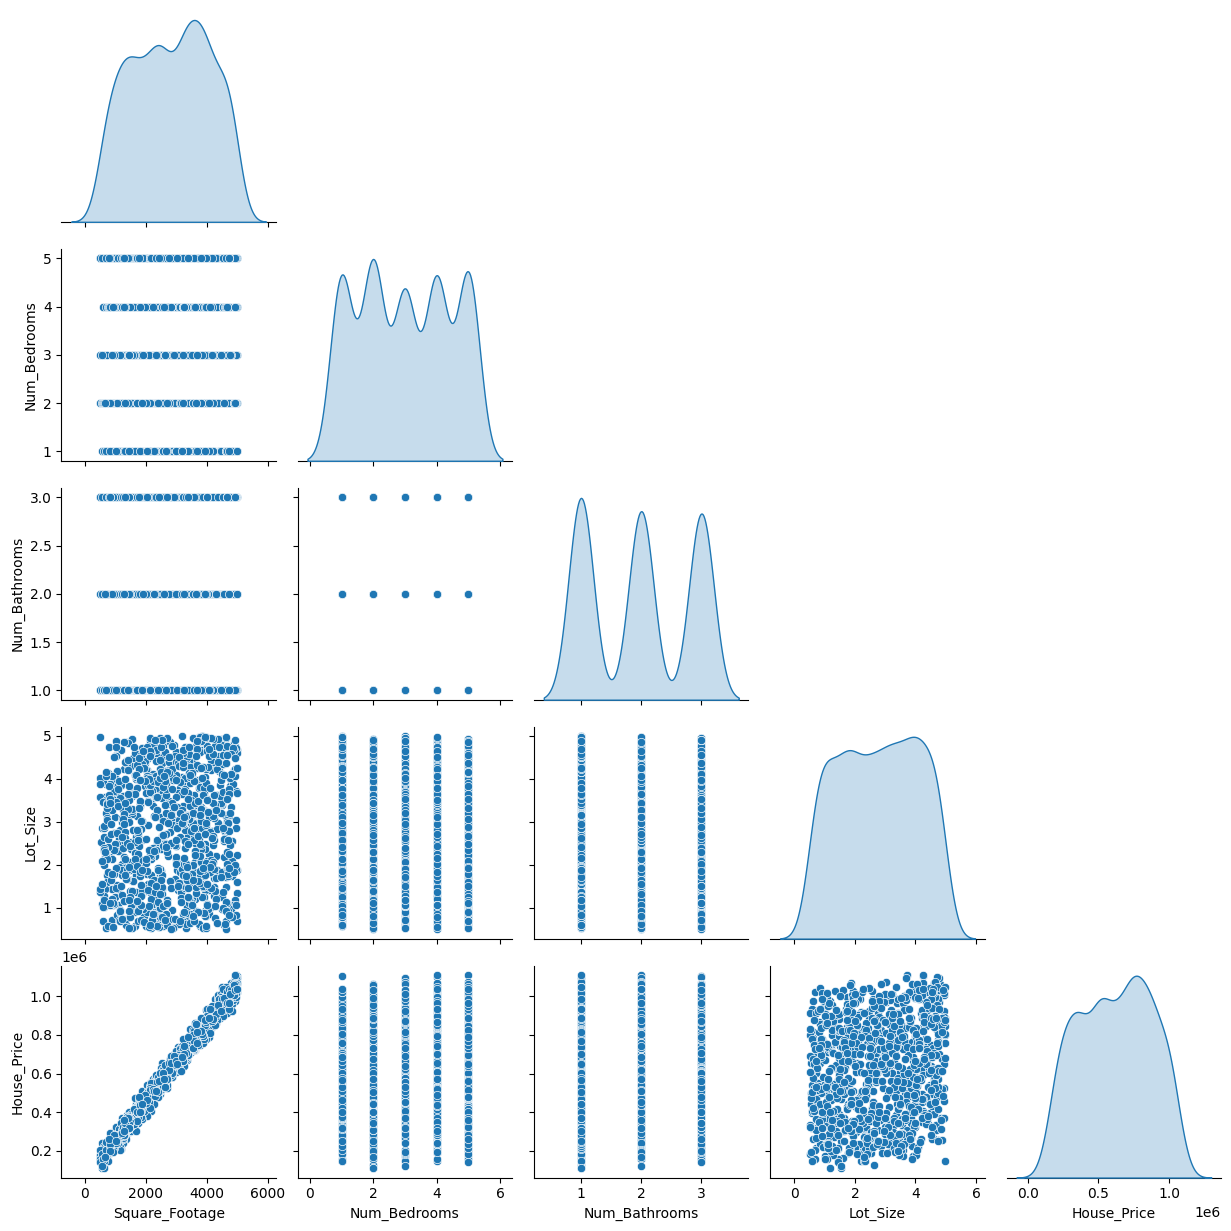

In [50]:
important_features = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Lot_Size', 'House_Price']
sns.pairplot(data[important_features], diag_kind='kde', corner=True)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X = data.drop(columns='House_Price')
y = data['House_Price']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [42]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


In [44]:
def evaluate_model(y_true, y_pred, dataset_type="Train"):
      r2 = r2_score(y_true, y_pred)
      mae = mean_absolute_error(y_true, y_pred)
      mse = mean_squared_error(y_true, y_pred)
      rmse = np.sqrt(mse)
      print(f"{dataset_type} Data:")
      print(f"R²: {r2:.2f}, MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}\n")

      evaluate_model(y_train, y_train_pred, "Train")
      evaluate_model(y_test, y_test_pred, "Test")

In [45]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

In [46]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Residuals')

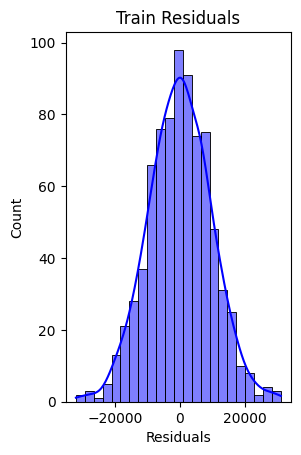

In [47]:
plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, color="blue")
plt.title("Train Residuals")
plt.xlabel("Residuals")

Text(0.5, 0, 'Residuals')

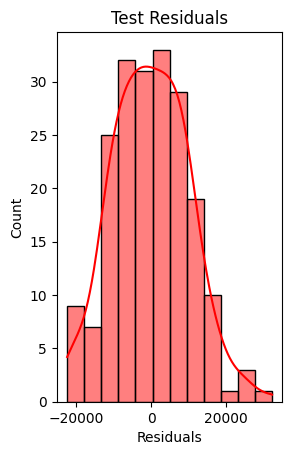

In [48]:
plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True, color="red")
plt.title("Test Residuals")
plt.xlabel("Residuals")

In [49]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>